# Chapter 6 - Energy audits/diagnostics using energy disaggregation

## Case Study - Estimating Compressed Air Leakage Using NILM Techniques

### GreEn-ER Data - 10 minute Time-Step

In [1]:
#importing libraries

import pandas as pd
import numpy as np

from os.path import join, isdir, isfile
from os import listdir
import re
from sys import stdout

from nilmtk.utils import get_datastore
from nilmtk.datastore import Key
# from nilmtk.timeframe import TimeFrame
from nilmtk.measurement import LEVEL_NAMES
from nilmtk.utils import get_module_directory, check_directory_exists
from nilm_metadata import save_yaml_to_datastore

In [82]:
#Choosing time - step
time_step='1h'

In [86]:
#Importing converted dataset
with pd.HDFStore('D:/GN/REDD/Teste_Green_ER_Limpo_SF_mod8/'+time_step+'/TGBT2/greener1.h5') as h5:
    df = pd.concat(map(h5.get, h5.keys()), axis=1)


In [87]:
df.columns=["Main", "Air Compressor", "Crous", "Fantome",'TD-GF','ASI','AHU']
df

Main  Air Compressor  Crous    Fantome  \
2017-01-01 01:00:00+01:00   94.659363        6.753242  8.700  32.205315   
2017-01-01 02:00:00+01:00   90.079811        4.040910  8.120  33.374474   
2017-01-01 03:00:00+01:00   98.198387        6.044826  8.015  37.234993   
2017-01-01 04:00:00+01:00   97.059044        5.533252  8.135  35.832432   
2017-01-01 05:00:00+01:00   96.271736        4.618905  8.050  36.987835   
...                               ...             ...    ...        ...   
2017-12-31 21:00:00+01:00  103.413399       22.558689  6.240  32.866856   
2017-12-31 22:00:00+01:00   89.873734        6.055715  6.225  37.416016   
2017-12-31 23:00:00+01:00   87.087784        4.529221  6.200  37.751347   
2018-01-01 00:00:00+01:00   86.890907        6.585399  6.445  32.984505   
2018-01-01 01:00:00+01:00  103.441910        5.553935  8.750  33.329475   

                              TD-GF        ASI    AHU  
2017-01-01 01:00:00+01:00  7.025807  38.595001  1.380  
2017-01-01 02:00:00+01:00  3.994429  38.630001  1.920  
2017-01-01 03:00:00+01:00  5.798572  38.720001  2.385  
2017-01-01 04:00:00+01:00  5.993361  37.860001  3.705  
2017-01-01 05:00:00+01:00  6.175000  38.279999  2.160  
...                             ...        ...    ...  
2017-12-31 21:00:00+01:00  5.822857  32.275002  3.650  
2017-12-31 22:00:00+01:00  5.772000  31.950001  2.455  
2017-12-31 23:00:00+01:00  4.442214  31.520000  2.645  
2018-01-01 00:00:00+01:00  5.881000  32.799999  2.195  
2018-01-01 01:00:00+01:00  6.108500  41.689999  8.010  

[8761 rows x 7 columns]

In [90]:
#Choosing training period
start_date='2017-1-1'
end_date='2017-12-23'

mask = (df.index >= start_date) & (df.index <= end_date)

#Calculating average power
df.loc[mask].mean()

Main              148.811081
Air Compressor     18.638144
Crous              17.765657
Fantome            35.022953
TD-GF              13.182505
ASI                36.916962
AHU                27.284828
dtype: float32

In [91]:
#Choosing test period
start_date1='2017-12-23'
end_date1='2018-1-1'

mask1 = (df.index >= start_date1) & (df.index <= end_date1)

#Calculating average power
df.loc[mask1].mean()

Main              96.037971
Air Compressor     9.717381
Crous              7.571383
Fantome           34.913528
TD-GF              5.021501
ASI               34.179607
AHU                4.634541
dtype: float32

## Training period

<IPython.core.display.Javascript object>


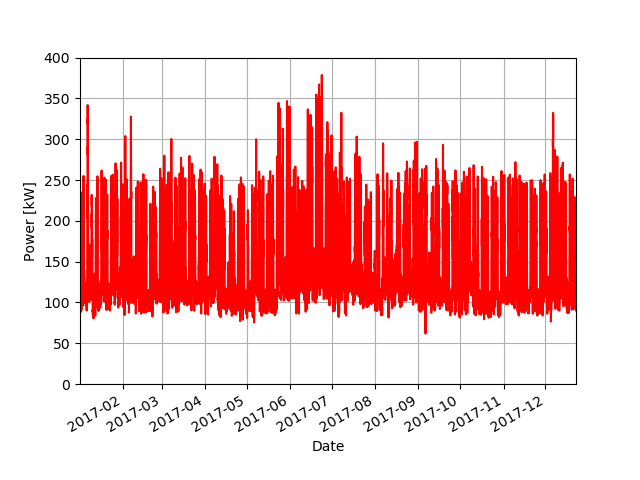

Text(0.5, 0, 'Date')

In [92]:
import matplotlib.pyplot as plt
%matplotlib notebook
#plotting global consumption training period
Fig, ax=plt.subplots()
ax=df['Main'].loc[mask].plot(ylim=(0,400),grid=True,color='r')
ax.set_ylabel('Power [kW]')
ax.set_xlabel('Date')

<IPython.core.display.Javascript object>


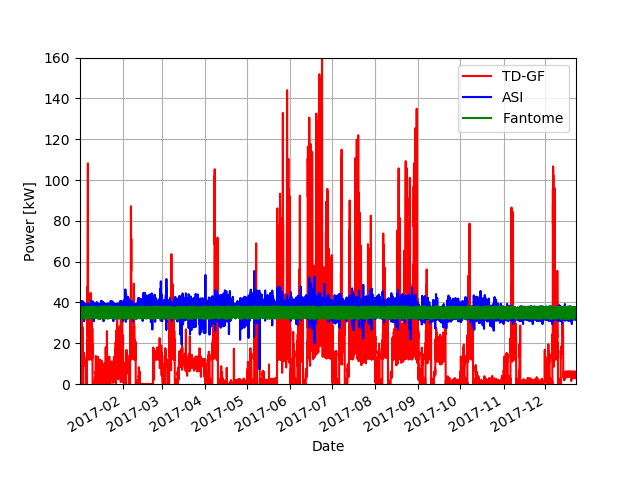

Text(0.5, 0, 'Date')

In [94]:
#Plotting data
ax1=df[['TD-GF','ASI','Fantome']].loc[mask].plot(ylim=(0,160),grid=True,color=['r','b','g'])
ax1.set_ylabel('Power [kW]')
ax1.set_xlabel('Date')
#df[['ASI','Fantome']]

<IPython.core.display.Javascript object>


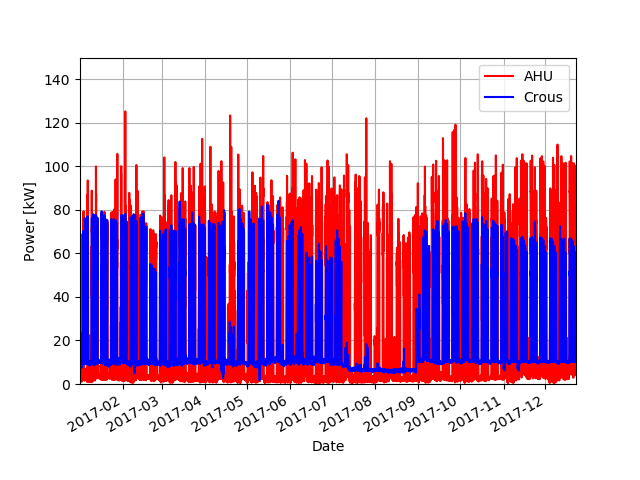

Text(0.5, 0, 'Date')

In [96]:
#Plotting data
ax2=df[['AHU','Crous']].loc[mask].plot(ylim=(0,150),grid=True,color=['r','b'])
ax2.set_ylabel('Power [kW]')
ax2.set_xlabel('Date')

<IPython.core.display.Javascript object>


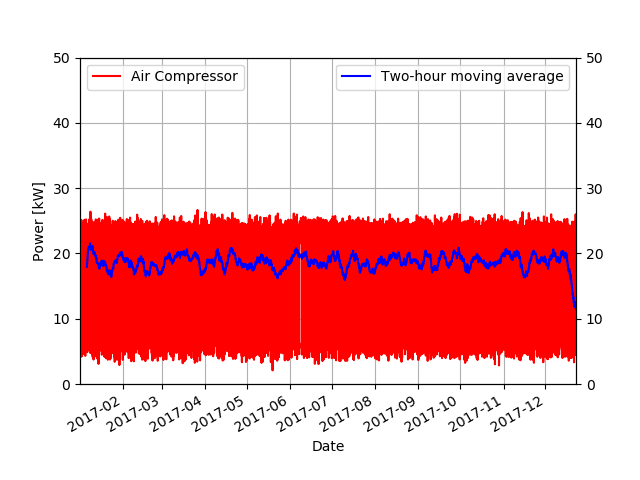

In [97]:
#Plotting Air compressor data
Fig, ax2=plt.subplots()
df34=df['Air Compressor']
df34.columns=['1 min sampling interval']
ax1=ax2.twinx()
ax2=df34.loc[mask].plot(ax=ax2,ylim=(0,50),grid=True,color=['r','b'])
ax1=df34.loc[mask].rolling(120).mean().plot(ax=ax1,color='b',ylim=(0,50))
ax2.set_ylabel('Power [kW]')
ax2.set_xlabel('Date')
ax2.legend(["1 minutes sampling data"])
ax2.legend(loc='upper left')
ax1.legend(["Two-hour moving average"])
plt.show()

## Test Period

<IPython.core.display.Javascript object>


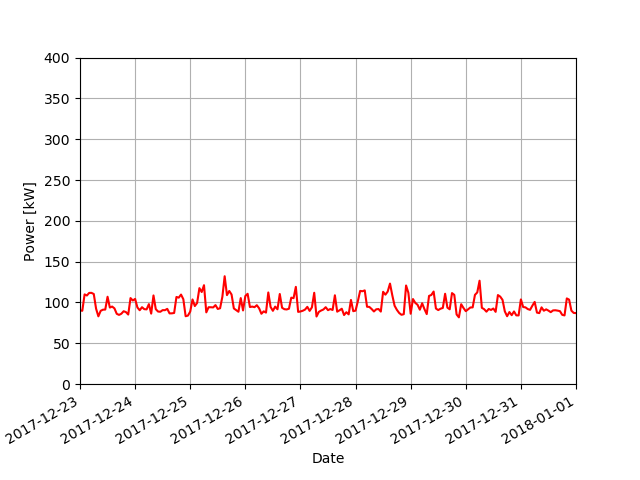

Text(0.5, 0, 'Date')

In [98]:
#plotting global consumption
Fig, ax=plt.subplots()
ax=df['Main'].loc[mask1].plot(ylim=(0,400),grid=True,color='r')
ax.set_ylabel('Power [kW]')
ax.set_xlabel('Date')

<IPython.core.display.Javascript object>


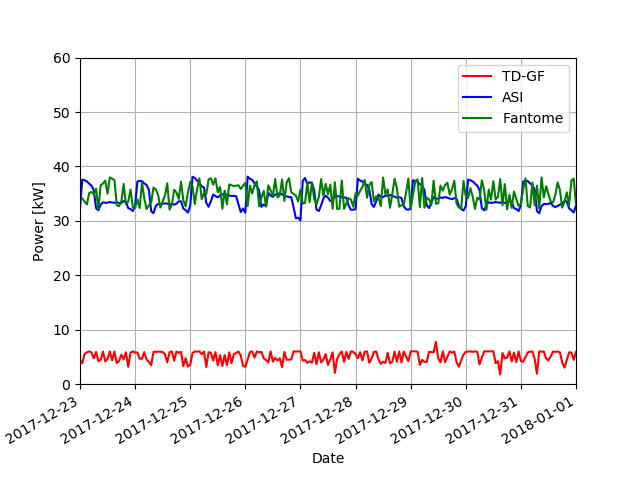

Text(0.5, 0, 'Date')

In [99]:
#Plotting data
ax1=df[['TD-GF','ASI','Fantome']].loc[mask1].plot(ylim=(0,60),grid=True,color=['r','b','g'])
ax1.set_ylabel('Power [kW]')
ax1.set_xlabel('Date')

<IPython.core.display.Javascript object>


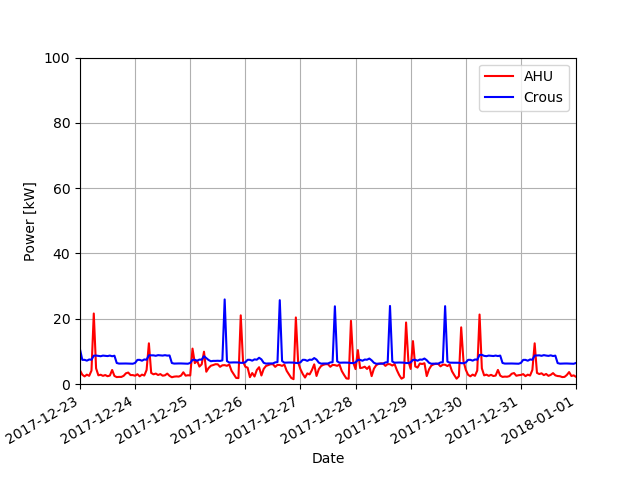

Text(0.5, 0, 'Date')

In [100]:
#Plotting data
ax2=df[['AHU','Crous']].loc[mask1].plot(ylim=(0,100),grid=True,color=['r','b'])
ax2.set_ylabel('Power [kW]')
ax2.set_xlabel('Date')

<IPython.core.display.Javascript object>


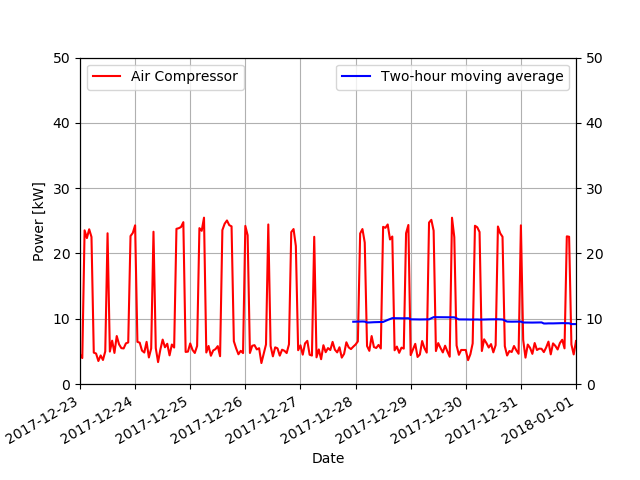

In [101]:
#Plotting Air compressor
Fig, ax=plt.subplots()
df34=df['Air Compressor']
df34.columns=['1 min sampling interval']
ax1=ax.twinx()
ax=df34.loc[mask1].plot(ax=ax,ylim=(0,50),grid=True,color=['r','b'])
df34.loc[mask1].rolling(120).mean().plot(ax=ax1,color='b',ylim=(0,50))
ax.set_ylabel('Power [kW]')
ax.set_xlabel('Date')
ax.legend(["1 minutes sampling data"])
ax.legend(loc='upper left')
ax1.legend(["Two-hour moving average"])
plt.show()

### Estimating Leaks

In [102]:
#Estimating Flow Rate from Power
comp=pd.DataFrame(df['Air Compressor'])
comp['Flow Rate']=np.where(comp['Air Compressor']>15,132.7,0)
comp.columns=['Power','Flow Rate']

In [103]:
#Calculating average value
tr_mean_c=comp.loc[mask].mean()
te_mean_c=comp.loc[mask1].mean()

#Calculating number of samples in each state
#tr_states_c=comp.loc[mask]['Power'].value_counts()
#te_states_c=comp.loc[mask1]['Power'].value_counts()


In [104]:
#df26.iloc[:,0]=df26.iloc[:,0]+df26.iloc[:, 2]
#df26.drop(df26.columns[2], axis=1, inplace=True)
#df26

IndexError: single positional indexer is out-of-bounds

In [105]:
#Assembling table
df23=pd.DataFrame(tr_mean_c).transpose()
df24=pd.DataFrame(te_mean_c).transpose()
df23=df23.append(df24,ignore_index=True)
df23['Period']=['Training','Test']
df23=df23.set_index('Period')


#df25=pd.DataFrame(tr_states_c).transpose()
#df26=pd.DataFrame(te_states_c).transpose()
#df26.iloc[:,0]=df26.iloc[:,0]+df26.iloc[:, 2]
#df26.drop(df26.columns[2], axis=1, inplace=True)
#df25=df25.append(df26,ignore_index=True)
#df25['Period']=['Training','Test']
#df25=df25.set_index('Period')
#df25.columns=['Unload','Load']
df25 = df25[['Load', 'Unload']]
#

#df27=pd.concat([df25, df23], axis=1)
df23

Power  Flow Rate
Period                        
Training  18.638133  97.568048
Test       9.717379  31.799078

In [108]:
#Calculating percentage of leaks
Leaks=df23['Flow Rate'][1]*100/df23['Flow Rate'][0]
print(Leaks)

32.591692745129464


In [110]:
#Calculating Average power after repair of the leaks
Flow_AVG_AR=df23['Flow Rate'][0]-df23['Flow Rate'][1]
P_load=23.5
P_unload=5.4
Flow_load=132.7
P_AR=P_AR=((Flow_AVG_AR/Flow_load)*(P_load-P_unload))+P_unload
P_AR

14.370748653755328

In [111]:
Normal_sche=235
no_con_sche=130
P_avg_n_BR=df.loc[mask].mean()[1]
P_avg_nocon_BR=df.loc[mask1].mean()[1]

cons_BR=((P_avg_n_BR*Normal_sche)+(P_avg_nocon_BR*no_con_sche))*24
cons_AR=((P_AR*Normal_sche)+(P_unload*no_con_sche))*24
reduc=cons_BR-cons_AR
print(cons_BR)
print(cons_AR)
print(reduc)


135437.35977172852
97899.02240718005
37538.33736454847


## NILMTK IMPLEMENTATION

In [112]:
#Importing libraries
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM, MLE, Hart85, Disaggregator
import nilmtk.utils

import pandas as pd
import time
from six import iteritems

import matplotlib.pyplot as plt
%matplotlib notebook


In [129]:
#Determining training and testing periods
time_step='1h'
train = DataSet('D:/GN/REDD/Teste_Green_ER_Limpo_SF_mod8/'+time_step+'/TGBT2/greener1.h5')
train.set_window(start="2017-1-1 00:00:00",end="2017-12-23 23:00:00")
test = DataSet('D:/GN/REDD/Teste_Green_ER_Limpo_SF_mod8/'+time_step+'/TGBT2/greener1.h5')
test.set_window(start="2017-12-23 00:00:00",end="2018-1-1 00:00:00")

build=1
train_elec = train.buildings[1].elec
test_elec = test.buildings[1].elec

<IPython.core.display.Javascript object>


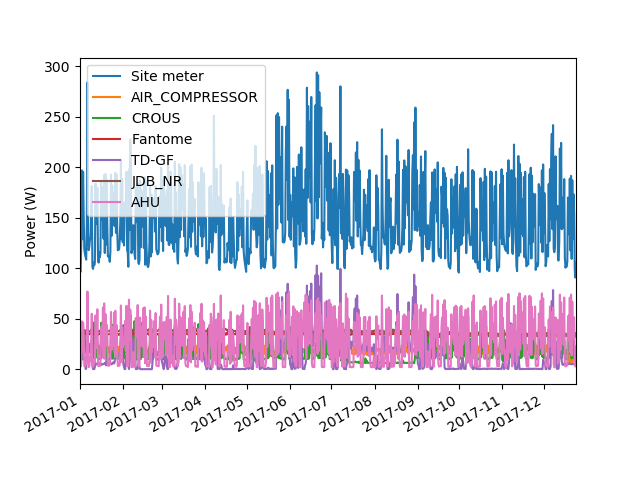

In [130]:
#Plotting training period data
plt.figure()
train_elec.plot()
#test_elec.plot()
plt.show()

<IPython.core.display.Javascript object>


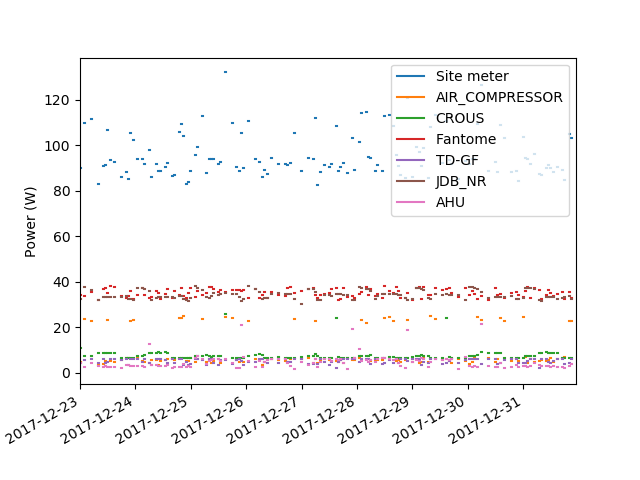

In [131]:
#Plotting test period data
plt.figure()
test_elec.plot()
plt.show()

In [132]:
#Selecting all loads for training
top_6_train_elec = train_elec.submeters().select_top_k(k=7)
top_6_train_elec

6/6 ElecMeter(instance=7, building=1, dataset='greener', appliances=[Appliance(type='AHU', instance=1)]))]))ce=1)])

MeterGroup(meters=
  ElecMeter(instance=6, building=1, dataset='greener', appliances=[Appliance(type='JDB_NR', instance=1)])
  ElecMeter(instance=4, building=1, dataset='greener', appliances=[Appliance(type='Fantome', instance=1)])
  ElecMeter(instance=7, building=1, dataset='greener', appliances=[Appliance(type='AHU', instance=1)])
  ElecMeter(instance=2, building=1, dataset='greener', appliances=[Appliance(type='AIR_COMPRESSOR', instance=1)])
  ElecMeter(instance=3, building=1, dataset='greener', appliances=[Appliance(type='CROUS', instance=1)])
  ElecMeter(instance=5, building=1, dataset='greener', appliances=[Appliance(type='TD-GF', instance=1)])
)

In [133]:
def predict(clf, test_elec, sample_period, timezone):
    pred = {}
    gt= {}
    
    # "ac_type" varies according to the dataset used. 
    # Make sure to use the correct ac_type before using the default parameters in this code.    
    for i, chunk in enumerate(test_elec.mains().load(physical_quantity = 'power', ac_type = 'active', sample_period=sample_period)):
        chunk_drop_na = chunk.dropna()
        pred[i] = clf.disaggregate_chunk(chunk_drop_na)
        gt[i]={}

        for meter in test_elec.submeters().meters:
            # Only use the meters that we trained on (this saves time!)    
            gt[i][meter] = next(meter.load(physical_quantity = 'power', ac_type = 'active', sample_period=sample_period))
        gt[i] = pd.DataFrame({k:v.squeeze() for k,v in iteritems(gt[i]) if len(v)}, index=next(iter(gt[i].values())).index).dropna()
        
    # If everything can fit in memory
    gt_overall = pd.concat(gt)
    gt_overall.index = gt_overall.index.droplevel()
    pred_overall = pd.concat(pred)
    pred_overall.index = pred_overall.index.droplevel()

    # Having the same order of columns
    gt_overall = gt_overall[pred_overall.columns]
    
    #Intersection of index
    gt_index_utc = gt_overall.index.tz_convert("UTC")
    pred_index_utc = pred_overall.index.tz_convert("UTC")
    common_index_utc = gt_index_utc.intersection(pred_index_utc)
    
    common_index_local = common_index_utc.tz_convert(timezone)
    gt_overall = gt_overall.loc[common_index_local]
    pred_overall = pred_overall.loc[common_index_local]
    appliance_labels = [m for m in gt_overall.columns.values]
    gt_overall.columns = appliance_labels
    pred_overall.columns = appliance_labels
    return gt_overall, pred_overall

In [134]:
#NILM application
classifiers = {'FHMM':FHMM()}
predictions = {}

if time_step=='6h':
    sample_period = 6*60*60
elif time_step=='1h':
    sample_period = 1*60*60
elif time_step=='10min':
    sample_period = 10*60
elif time_step=='1min':
    sample_period = 1*60

for clf_name, clf in classifiers.items():
    print("*"*5)
    print(clf_name)
    print("*" *5)
    start = time.time()
    # If instead of top_5 we wanted to train on all appliance, we would write 
    #fhmm.train(train_elec, sample_period=600)
    clf.train(top_6_train_elec)#, sample_period=sample_period)
    end = time.time()
    print("Runtime =", end-start, "seconds.")
    gt, predictions[clf_name] = predict(clf, test_elec, sample_period, train.metadata['timezone'])

*****
FHMM
*****
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='greener', appliances=[Appliance(type='JDB_NR', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='greener', appliances=[Appliance(type='Fantome', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=7, building=1, dataset='greener', appliances=[Appliance(type='AHU', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='greener', appliances=[Appliance(type='AIR_COMPRESSOR', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='greener', appliances=[Appliance(type='CROUS', instance=1)])' with 5 states
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='greener', appliances=[Appliance(type='TD-GF', instance=1)])' with 3 states
Runtime = 8.100358247756958 seconds.


In [135]:
#Assingning correct loads to NILM output
#appliance_labels = [m for m in gt.columns.values]
appliance_labels=[]
for i in range(len(top_6_train_elec.meters)):
    s = str(top_6_train_elec.meters[i])
    result = re.search("type='(.*)', instance=1", s)
    appliance_labels.append(result.group(1))

gt.columns = appliance_labels
#predictions['CO'].columns = appliance_labels
predictions['FHMM'].columns = appliance_labels



<IPython.core.display.Javascript object>


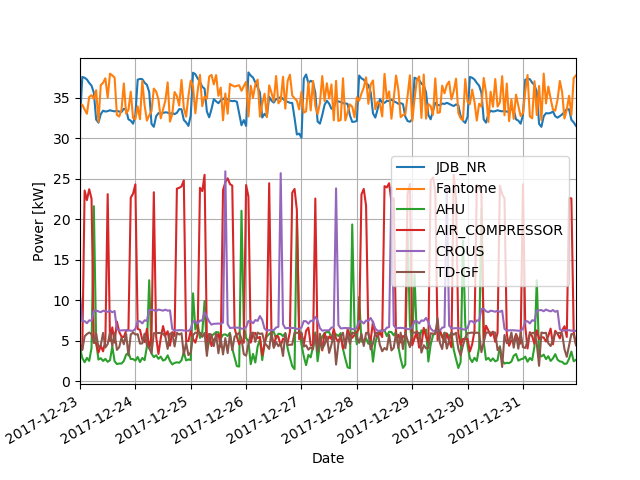

Text(0, 0.5, 'Power [kW]')

In [136]:
#Plotting NILM output
gt.plot()
plt.grid()
plt.xlabel('Date')
plt.ylabel('Power [kW]')

<IPython.core.display.Javascript object>


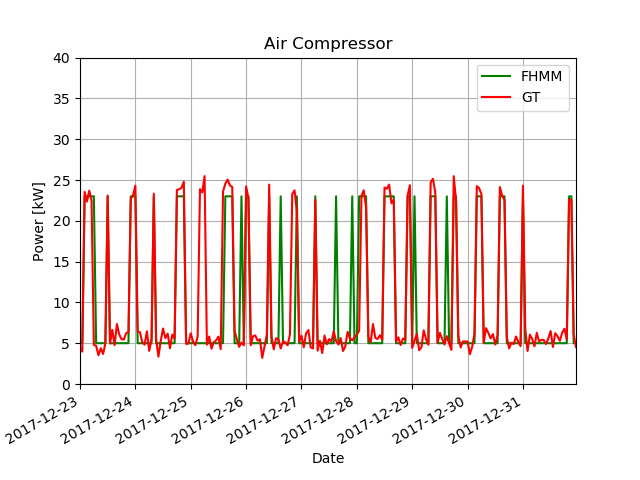

In [137]:
#Plotting Air Compressor NILM
plt.figure()
#predictions['CO']['AIR_COMPRESSOR'].plot(label="CO",color='b')
predictions['FHMM']['AIR_COMPRESSOR'].plot(label="FHMM",color='g')
gt['AIR_COMPRESSOR'].plot(label="GT",color='r')
plt.title('Air Compressor')
plt.xlabel('Date')
plt.ylabel('Power [kW]')
plt.ylim(0,40)
plt.grid(True)
plt.legend()

<IPython.core.display.Javascript object>


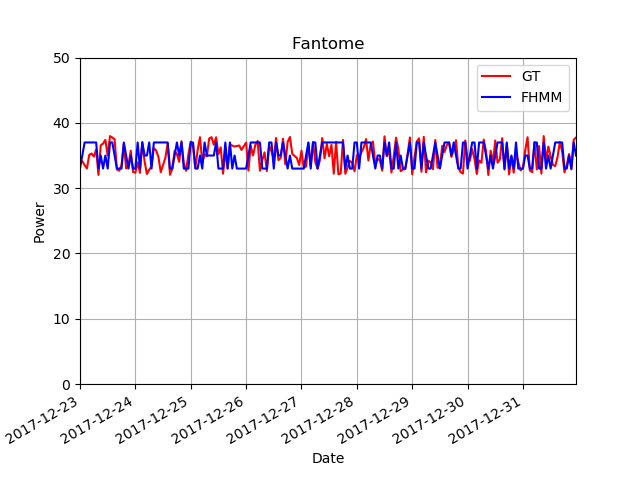

In [138]:
#Plotting Fantome NILM
plt.figure()
#predictions['CO']['Fantome'].plot(label="CO",color='b')
gt['Fantome'].plot(label="GT",color='r')
predictions['FHMM']['Fantome'].plot(label="FHMM",color='b')
plt.title('Fantome')
plt.xlabel('Date')
plt.ylabel('Power')
plt.ylim(0,50)
plt.grid(True)
plt.legend()

<IPython.core.display.Javascript object>


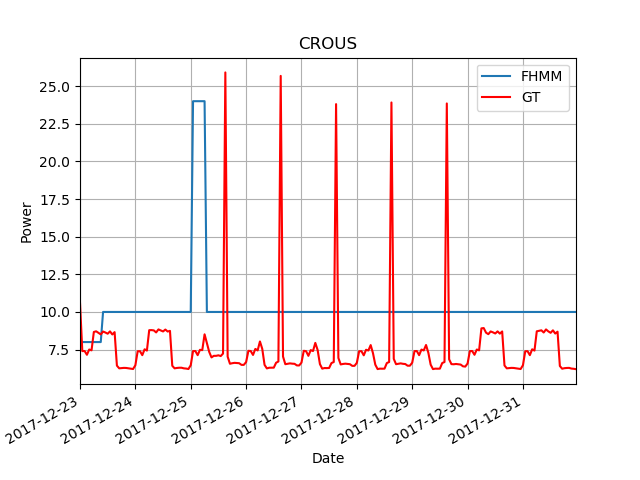

In [139]:
#Plotting Crous NILM
plt.figure()
#predictions['CO']['CROUS'].plot(label="CO",color='b')
predictions['FHMM']['CROUS'].plot(label="FHMM")
gt['CROUS'].plot(label="GT",color='r')
plt.title('CROUS')
plt.xlabel('Date')
plt.ylabel('Power')
plt.grid(True)
plt.legend()

<IPython.core.display.Javascript object>


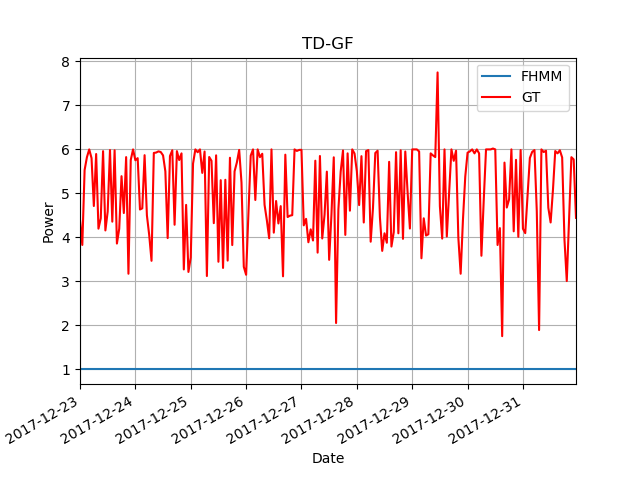

In [140]:
#Plotting TD-GF NILM
plt.figure()
#predictions['CO']['TD-GF'].plot(label="CO",color='b')
predictions['FHMM']['TD-GF'].plot(label="FHMM")
gt['TD-GF'].plot(label="GT",color='r')
plt.title('TD-GF')
plt.xlabel('Date')
plt.ylabel('Power')
plt.grid(True)
plt.legend()

<IPython.core.display.Javascript object>


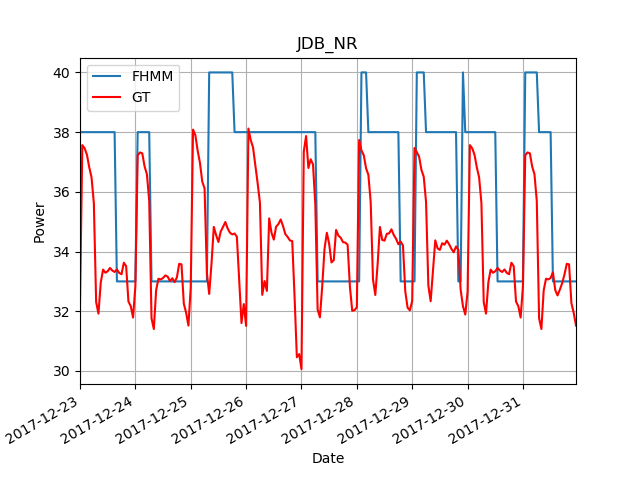

In [141]:
#Plotting ASI NILM
plt.figure()
#predictions['CO']['TD-GF'].plot(label="CO",color='b')
predictions['FHMM']['JDB_NR'].plot(label="FHMM")
gt['JDB_NR'].plot(label="GT",color='r')
plt.title('JDB_NR')
plt.xlabel('Date')
plt.ylabel('Power')
plt.grid(True)
plt.legend()

<IPython.core.display.Javascript object>


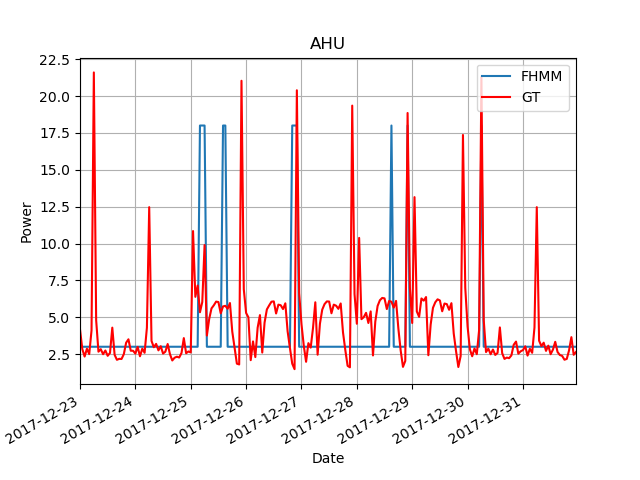

In [142]:
#Plotting AHU NILM
plt.figure()
#predictions['CO']['TD-GF'].plot(label="CO",color='b')
predictions['FHMM']['AHU'].plot(label="FHMM")
gt['AHU'].plot(label="GT",color='r')
plt.title('AHU')
plt.xlabel('Date')
plt.ylabel('Power')
plt.grid(True)
plt.legend()

### Estimating Leaks NILM

In [143]:
df12=pd.DataFrame(predictions['FHMM']['AIR_COMPRESSOR'])
df12['Flow Rate']=np.where(df12['AIR_COMPRESSOR']>15,132.7,0)
df12.columns=['Power','Flow Rate']

In [144]:
#tr_mean_c=comp.loc[mask].mean()

te_mean_c_NILM=df12.mean()

#tr_states_c=comp.loc[mask]['Power'].value_counts()
#te_states_c_NILM=df12['Power'].value_counts()




df13=pd.DataFrame(tr_mean_c).transpose()
df14=pd.DataFrame(te_mean_c_NILM).transpose()
df13=df13.append(df14,ignore_index=True)
df13['Period']=['Training','Test']
df13=df13.set_index('Period')


#df15=pd.DataFrame(tr_states_c).transpose()
#df16=pd.DataFrame(te_states_c_NILM).transpose()
#df15=df15.append(df16,ignore_index=True)
#df15['Period']=['Training','Test']
#df15=df15.set_index('Period')
#df15.columns=['Unload','Load']
#df15 = df15[['Load', 'Unload']]


#df16=pd.concat([df15, df13], axis=1)
df13

Power  Flow Rate
Period                        
Training  18.638133  97.568048
Test       9.500000  33.175000

In [146]:
Leaks_NILM=df13['Flow Rate'][1]*100/df13['Flow Rate'][0]
print(Leaks_NILM)

34.00191021967834


In [147]:
df33=df23.iloc[1:].append(df13.iloc[1:])
df33['Estimation']=['From Data','NILM']
df33=df33.set_index('Estimation')
df33

Power  Flow Rate
Estimation                     
From Data   9.717379  31.799078
NILM        9.500000  33.175000

In [148]:
#Calculating Average power after repair of the leaks
Flow_AVG_AR_NILM=df23['Flow Rate'][0]-df13['Flow Rate'][1]




P_AR_NILM=((Flow_AVG_AR_NILM/Flow_load)*(P_load-P_unload))+P_unload
P_AR_NILM

14.18307584269542

In [149]:
cons_AR_NILM=((P_AR_NILM*Normal_sche)+(P_unload*no_con_sche))*24
reduc_NILM=cons_BR-cons_AR_NILM
print(cons_BR)
print(cons_AR_NILM)
print(reduc_NILM)

135437.35977172852
96840.54775280217
38596.81201892634


In [150]:
print(reduc)
print(reduc_NILM)

37538.33736454847
38596.81201892634
